# 3D grasp optimization with two fingers

In [72]:
using BenchmarkTools, TimerOutputs
include("ex9a_data.jl")                        # load module eX
include("../../../pipg_toolkit/pipg_suite.jl") # load module utils, pipg
include("../../../pipg_toolkit/pipg_var.jl");  # load module iX

## JuMP

In [73]:
utils.solve_JuMP!(iX.xopt,iX.uopt,:gurobi,false);

Academic license - for non-commercial use only - expires 2021-03-10
Termination status: OPTIMAL

## PIPG

In [74]:
iX.reset_pipg_powiter!(); # initialize pipg and powiter solution variables

In [75]:
# call PIPG
pipg.solver!(iX.x,iX.u,iX.v,iX.w,iX.q,iX.γk,iX.γ4,iX.γ5,iX.γ1,iX.γ2,iX.γ3,
            iX.κ1x,iX.κ2x,iX.κ1u,iX.κ2u)

In [76]:
utils.compute_error(iX.x,iX.u,iX.xopt,iX.uopt,true,:scaled,iX.get_pipg_itercount());

Total PIPG iterations          :147
Norm of optimum                :8.687868917161016
Distance to optimum (absolute) :0.00032569543432270365
Distance to optimum (relative) :3.748852997532714e-5 
Dynamics error                 :1.2845608186040636e-5

# Benchmarking

## Method 1 : `BenchmarkTools`

In [77]:
@benchmark pipg.solver!($(iX.x),$(iX.u),$(iX.v),$(iX.w),$(iX.q),$(iX.γk),$(iX.γ4),$(iX.γ5),
                         $(iX.γ1),$(iX.γ2),$(iX.γ3),$(iX.κ1x),$(iX.κ2x),$(iX.κ1u),$(iX.κ2u)) setup = (iX.reset_pipg_powiter!())

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     66.510 μs (0.00% GC)
  median time:      79.923 μs (0.00% GC)
  mean time:        81.095 μs (0.00% GC)
  maximum time:     176.517 μs (0.00% GC)
  --------------
  samples:          6155
  evals/sample:     10

## Method 2 : `TimerOutputs`

In [78]:
to_var = TimerOutput();

In [79]:
enable_timer!(to_var)
reset_timer!(to_var)
for _ in 1:10
    iX.reset_pipg!()
    utils.reset_powiter!()
   @timeit to_var "PIPG" pipg.solver!(iX.x,iX.u,iX.v,iX.w,iX.q,iX.γk,iX.γ4,iX.γ5,iX.γ1,iX.γ2,iX.γ3,iX.κ1x,iX.κ2x,iX.κ1u,iX.κ2u)
end
disable_timer!(to_var)
show(to_var)

 ──────────────────────────────────────────────────────────────────
                           Time                   Allocations      
                   ──────────────────────   ───────────────────────
 Tot / % measured:      378ms / 2.99%           43.4MiB / 1.40%    

 Section   ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────
 PIPG          10   11.3ms   100%  1.13ms    622KiB  100%   62.2KiB
 ──────────────────────────────────────────────────────────────────

In [ ]:
###   DIAGNOSTICS
#     @code_warntype pipg.solver!(iX.x,iX.u,iX.v,iX.w,iX.q,iX.γk,iX.γ4,iX.γ5,iX.γ1,iX.γ2,iX.γ3,
#                 iX.κ1x,iX.κ2x,iX.κ1u,iX.κ2u)
#     @code_warntype pipg.solver_diagnostic!(iX.x,iX.u,iX.v,iX.w,iX.q,iX.γk,iX.γ4,iX.γ5,iX.γ1,iX.γ2,iX.γ3,
#                             iX.κ1x,iX.κ2x,iX.κ1u,iX.κ2u,iX.xopt,iX.uopt,iX.rd2o,iX.dye)
#     @benchmark eX.project_u!($(iX.u[1]),$(iX.u[2]),$1)
#     @benchmark eX.project_x!($(iX.x[1]),$(iX.x[2]),$1)
#     @code_warntype eX.project_x!(iX.x[1],iX.x[2],1)
#     @code_warntype eX.project_u!(iX.u[1],iX.u[2],1)

# Visualization

In [80]:
utils.solve_JuMP!(iX.xopt,iX.uopt,:gurobi,false);

Academic license - for non-commercial use only - expires 2021-03-10
Termination status: OPTIMAL

In [81]:
iX.reset_pipg_powiter!();

In [82]:
pipg.solver_diagnostic!(iX.x,iX.u,iX.v,iX.w,iX.q,iX.γk,iX.γ4,iX.γ5,iX.γ1,iX.γ2,iX.γ3,
                        iX.κ1x,iX.κ2x,iX.κ1u,iX.κ2u,iX.xopt,iX.uopt,iX.rd2o,iX.dye,iX.proj_count_x,iX.proj_count_u,false);

Power iteration estimate of σ: 4.533867949474416
SVD estimate of σ            : 4.535792910375217
Total PIPG iterations        : 1000

In [83]:
utils.compute_error(iX.x,iX.u,iX.xopt,iX.uopt,true,:scaled,iX.get_pipg_itercount()); 

Total PIPG iterations          :1000
Norm of optimum                :8.687868917161016
Distance to optimum (absolute) :0.00010881629552228489
Distance to optimum (relative) :1.2525084869471466e-5 
Dynamics error                 :9.659026674118274e-12

In [84]:
# bring solution variables back to original scale
utils.set_scale!(iX.x,iX.u,:scale)
utils.set_scale!(iX.xopt,iX.uopt,:scale);

## Solution Quality

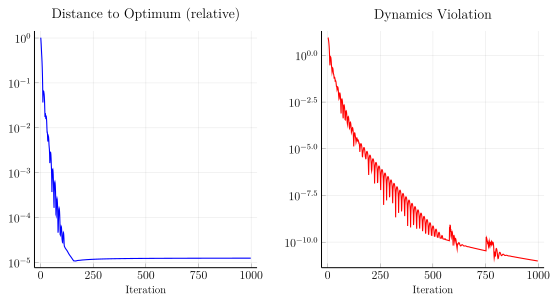

In [85]:
common_plotter.solution_quality(iX.rd2o,iX.dye,iX.get_pipg_itercount())

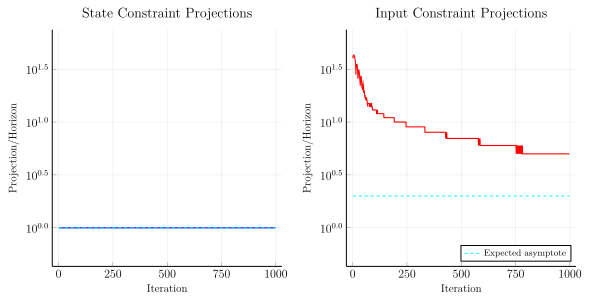

In [86]:
common_plotter.projection_count(iX.proj_count_x,iX.proj_count_u,eX.proj_count_limit...,iX.get_pipg_itercount())